In [1]:
import numpy as np

import scipy.signal

import matplotlib.pyplot as plt

import librosa

import librosa.display


### LJSpeech 파일 이름 리스트로 불러오기

In [2]:
import os
from os import listdir
from os.path import isfile, join

data_dir = '/home/scpark/hard/datasets/LJSpeech-1.1/wavs'

# 해당 디렉토리에 있는 파일 중 이름에 wav가 들어가 있는 모든 파일의 경로를 리스트에 담는다.
data_files = [join(data_dir, f) for f in listdir(data_dir) if isfile(join(data_dir, f)) if 'wav' in f]
data_files.sort()

print('wave files : ', len(data_files))
print(data_files[0])


wave files :  13100
/home/scpark/hard/datasets/LJSpeech-1.1/wavs/LJ001-0001.wav


### 첫번째 오디오 파일을 열고, waveform, spectrogram, mel-spectrogram 보여주고 들어보기

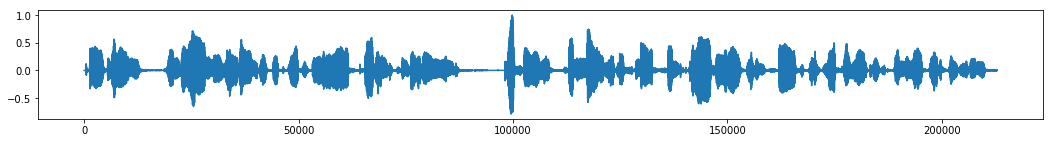

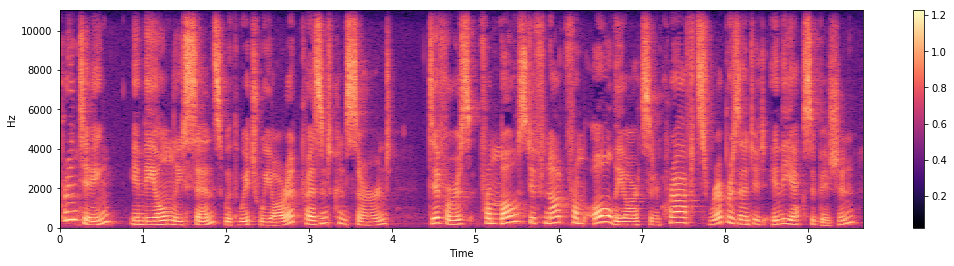

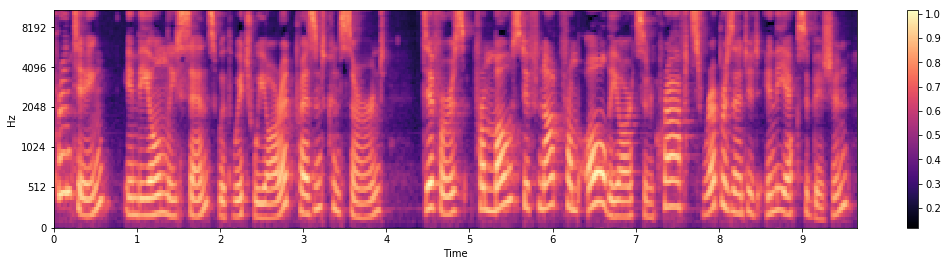

In [3]:
# 첫번째 파일 로드
wav, _ = librosa.core.load(data_files[0])
# normalizing
wav /= max(abs(wav))

'''
waveform 그리기
'''
plt.figure(figsize=[18, 2])
plt.plot(wav)
plt.show()

#spectrogram과 mel-spectrogram 값을 normalizing하기 위한 함수
#참고 : https://github.com/keithito/tacotron/blob/master/util/audio.py
def normalize(S):
    return (20 * np.log10(S + 1e-5) + 100) / 120


#spectrogram 구하기
spec = librosa.core.stft(wav, n_fft=2048, hop_length=512)
spec = np.abs(spec)


#mel-spectrogram 구하기
mel_matrix = librosa.filters.mel(sr=22050, n_fft=2048, fmin=0.0, fmax=8000, n_mels=80)
mel = mel_matrix @ spec 

'''
spectrogram 보여주기
'''
plt.figure(figsize=[18, 4])
librosa.display.specshow(normalize(spec), y_axis='linear', x_axis='time')
plt.colorbar()
plt.show()

'''
mel-spectrogram 보여주기
'''
plt.figure(figsize=[18, 4])
librosa.display.specshow(normalize(mel), y_axis='mel', x_axis='time')
plt.colorbar()
plt.show()

'''
wav 들어보기
'''
import IPython.display as ipd
ipd.Audio(wav, rate=22050)


### DFT(Discrete Fourier Transform) 직접 해보기

frame length :  256


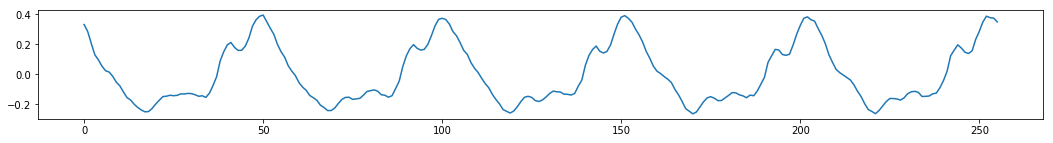

In [4]:
# 256-points DFT
N = 256

# DFT로 분석할 프레임
frame = wav[2000:2000+N]
print('frame length : ', len(frame))

'''
frame 보기
'''
plt.figure(figsize=[18, 2])
plt.plot(frame)
plt.show()


#### cos basis 보여주기
### $cos(2\pi k n/N)$

0번 진동


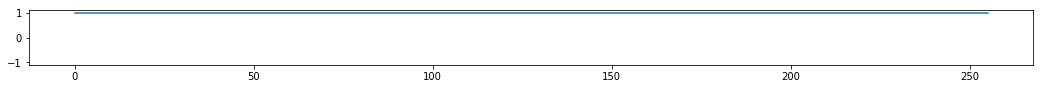

8번 진동


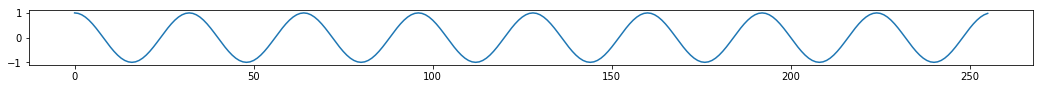

16번 진동


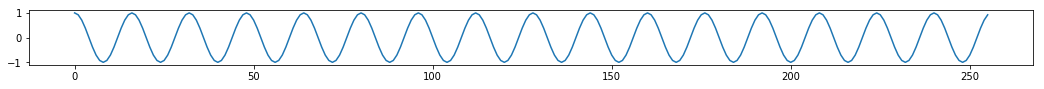

24번 진동


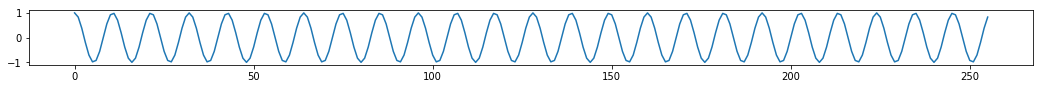

32번 진동


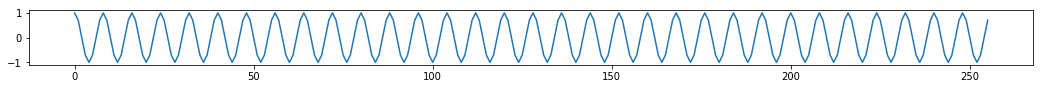

40번 진동


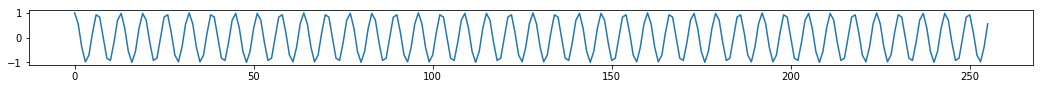

48번 진동


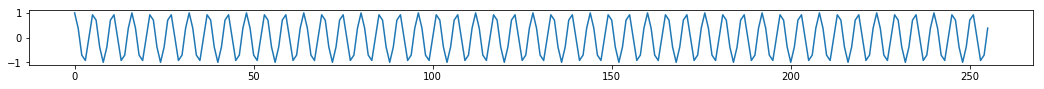

56번 진동


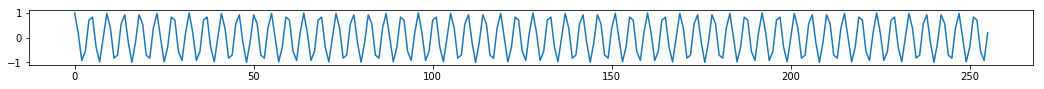

64번 진동


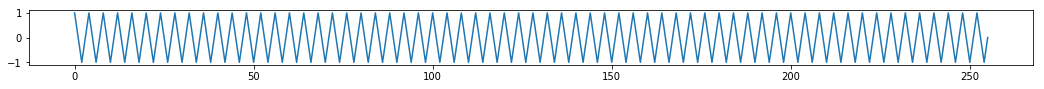

72번 진동


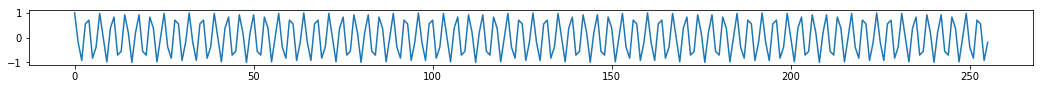

80번 진동


88번 진동


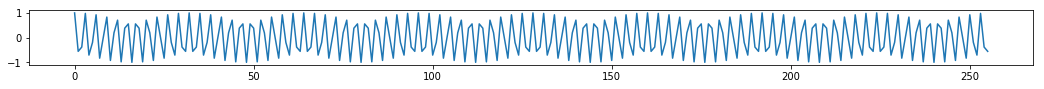

96번 진동


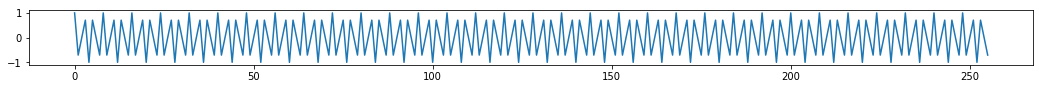

104번 진동


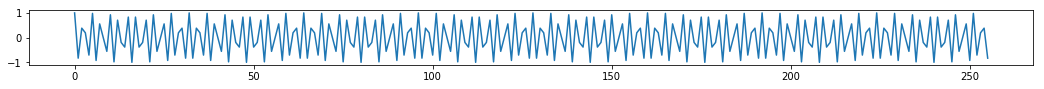

112번 진동


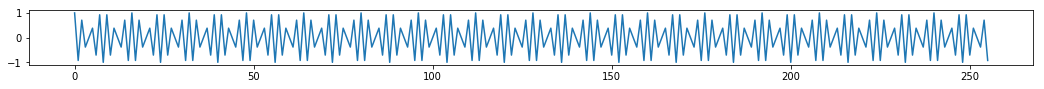

120번 진동


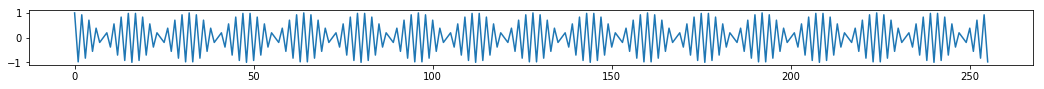

128번 진동


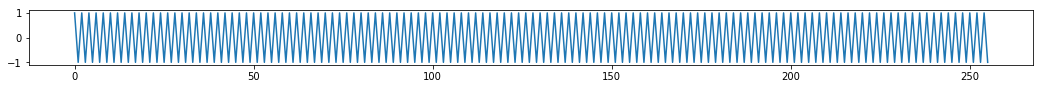

136번 진동


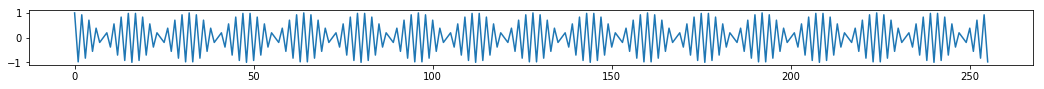

144번 진동


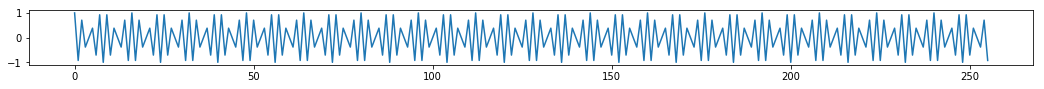

152번 진동


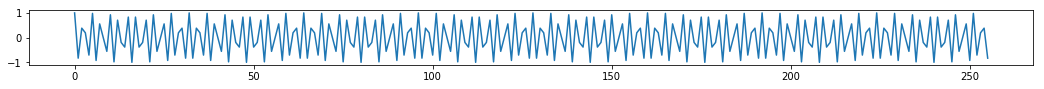

160번 진동


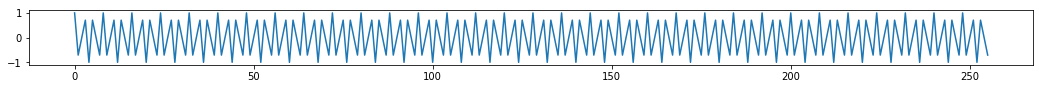

168번 진동


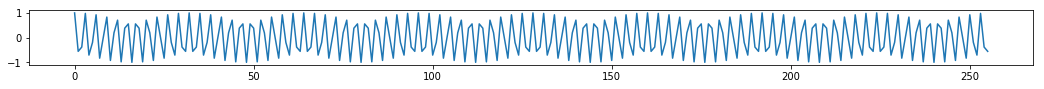

176번 진동


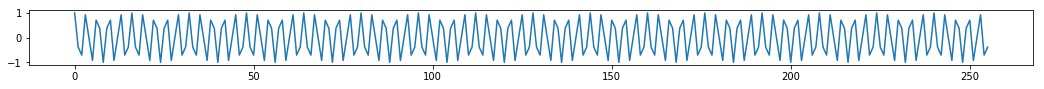

184번 진동


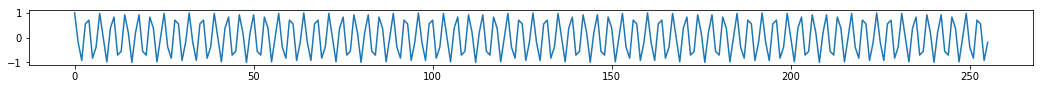

192번 진동


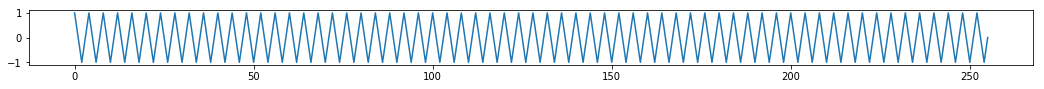

200번 진동


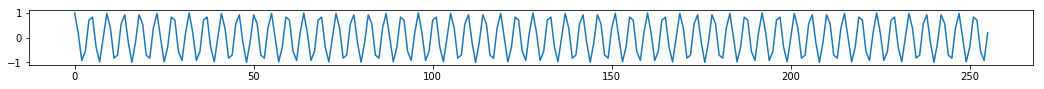

208번 진동


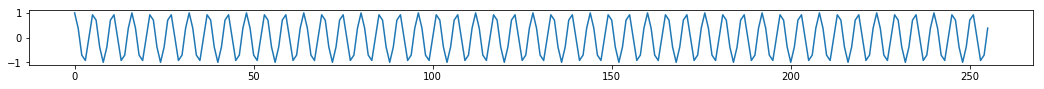

216번 진동


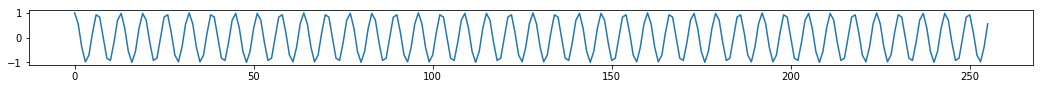

224번 진동


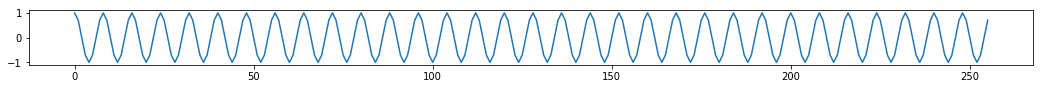

232번 진동


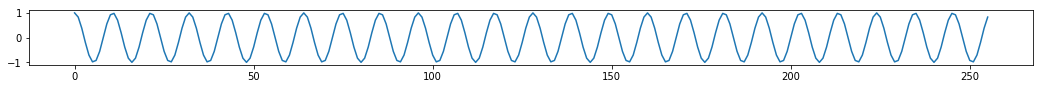

240번 진동


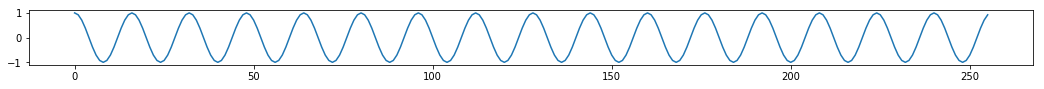

248번 진동


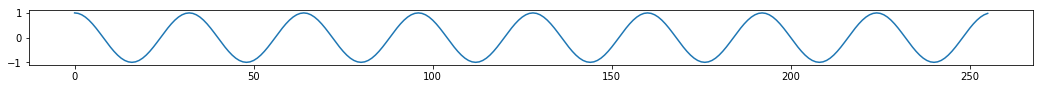

In [5]:
# [0, 1, 2, ..., N-1]
n = np.linspace(0, N-1, N)

# 0번 진동(무진동)부터 N-1번 진동까지 8씩 띄어서 보여줌 
for k in range(0, N, 8):
    # N구간 내에서 k번 진동하는 cos파형 만듬
    # k가 N/2를 넘어가면 aliasing현상으로 N-k번 진동하는 파형으로 나타남에 주목(중요)
    cos_basis = np.cos(2 * np.pi * k * n / N)
    
    '''
    cos basis 보여주기
    '''
    print(str(k) + '번 진동')
    plt.figure(figsize=[18, 1])
    plt.plot(cos_basis)
    plt.ylim([-1.1, 1.1])
    plt.show()
    

#### cos coefficients 구하기
### $\color{red}{X_k=\sum_{n=0}^{N-1}x[n] \cdot [cos(2\pi k n/N)}-j\cdot sin(2\pi k n/N)]$

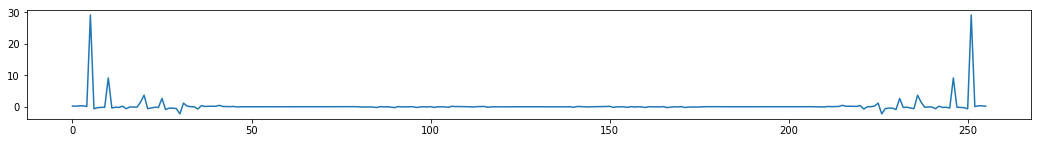

In [6]:
# [0, 1, 2, ..., N-1]
n = np.linspace(0, N-1, N)

cos_coefficients = []
for k in range(0, N):
    # N구간 내에서 k번 진동하는 cos파형 만듬
    cos_basis = np.cos(2 * np.pi * k * n / N)
    # 데이터 프레임과 cos basis를 곱하고 모든 값을 더해 해당 basis에 대한 계수(coefficient)를 구한다.
    coefficient = np.sum(frame * cos_basis)
    cos_coefficients.append(coefficient)
    
cos_coefficients = np.array(cos_coefficients)

'''
cos coefficients 시각화
'''
plt.figure(figsize=[18, 2])
plt.plot(cos_coefficients)
plt.show()

#### 연습 1: sin basis들을 그려보고, cos basis들과의 차이를 생각해봅시다. 
### $-sin(2\pi k n/N)$


#### 연습 2: sin coefficients를 구하고 시각화하여 cos coefficients와의 차이를 살펴봅시다. (중요)
### $\color{red}{X_k=\sum_{n=0}^{N-1}x[n] \cdot [\color{black}{cos(2\pi k n/N)}}\color{red}{-j\cdot sin(2\pi k n/N)]}$

#### complex exponential function basis 보여주기
### $e^{-j2\pi k n/N}=cos(2\pi k n/N)-jsin(2\pi k n/N)$

0번 진동


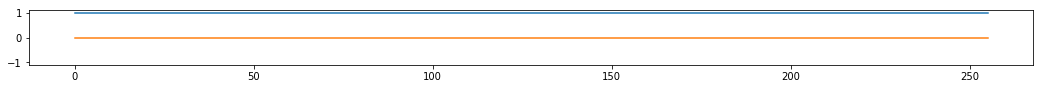

8번 진동


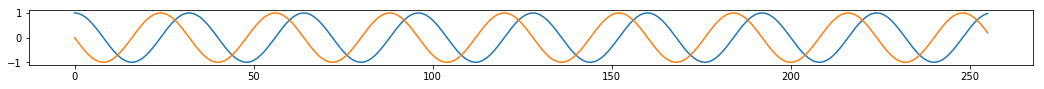

16번 진동


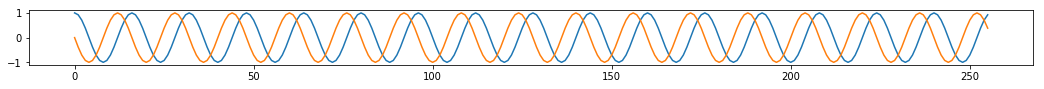

24번 진동


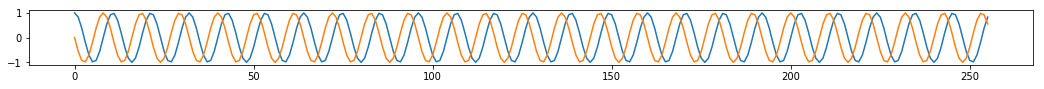

32번 진동


40번 진동


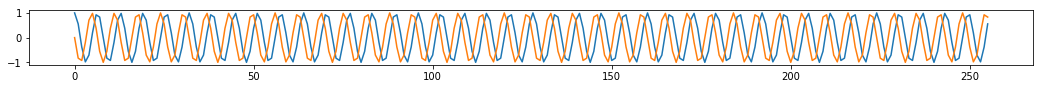

48번 진동


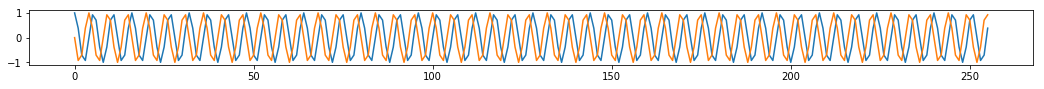

56번 진동


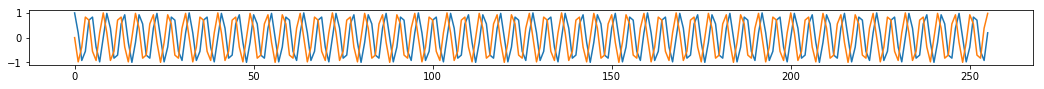

64번 진동


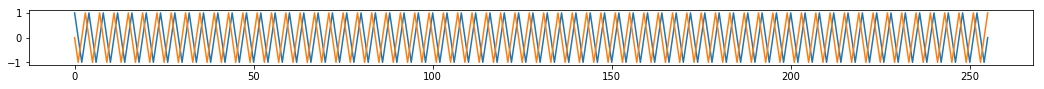

72번 진동


80번 진동


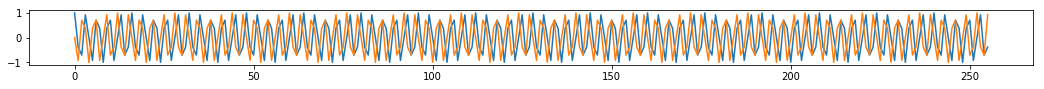

88번 진동


96번 진동


104번 진동


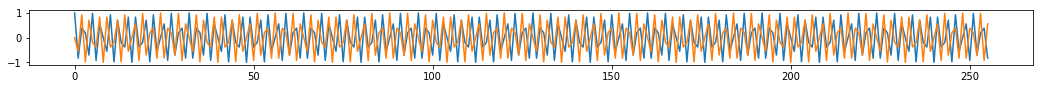

112번 진동


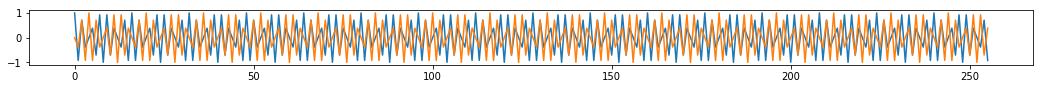

120번 진동


128번 진동


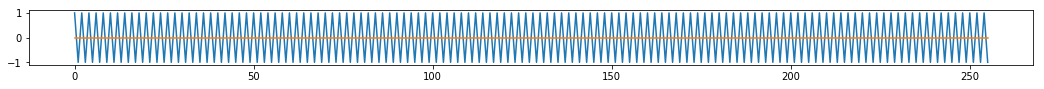

136번 진동


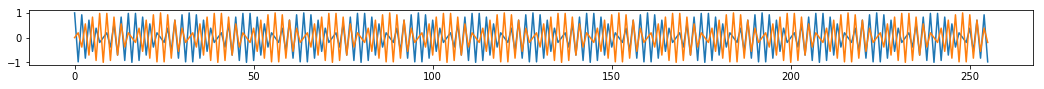

144번 진동


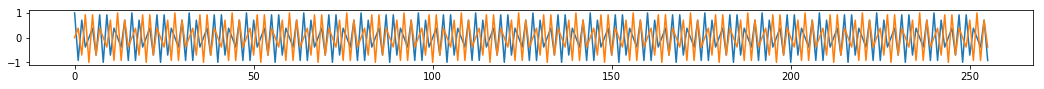

152번 진동


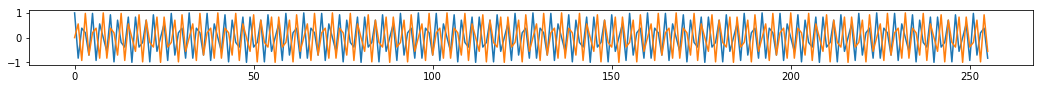

160번 진동


168번 진동


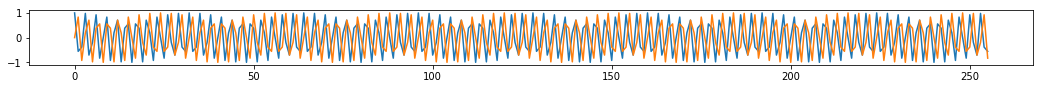

176번 진동


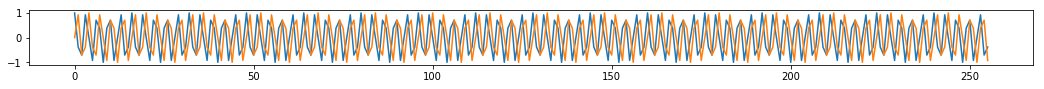

184번 진동


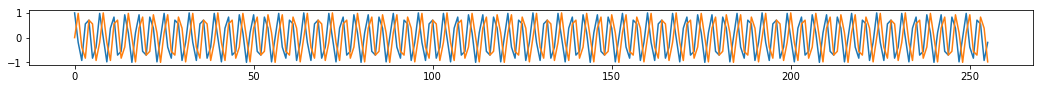

192번 진동


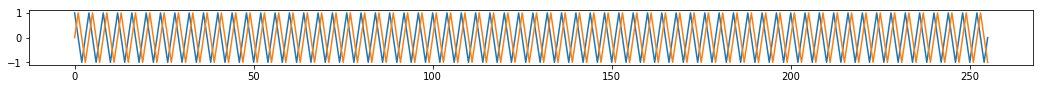

200번 진동


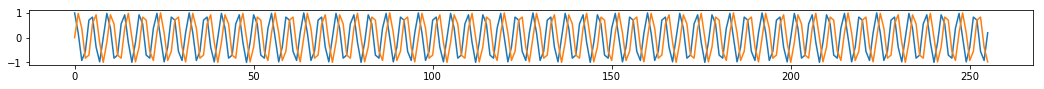

208번 진동


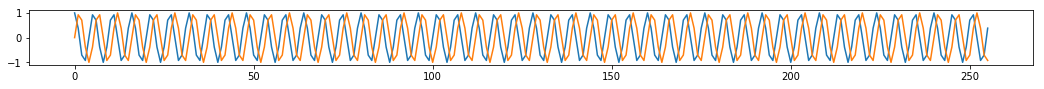

216번 진동


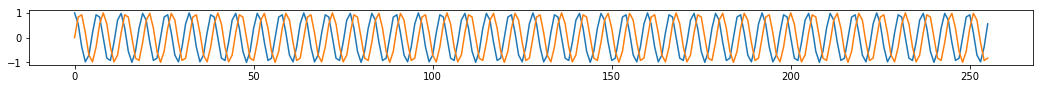

224번 진동


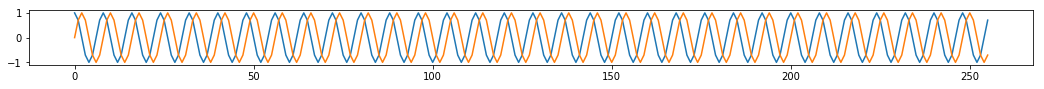

232번 진동


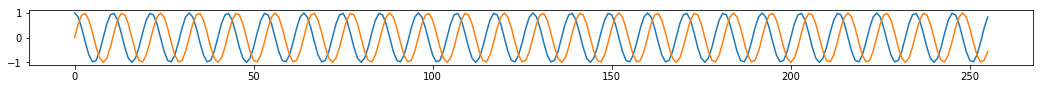

240번 진동


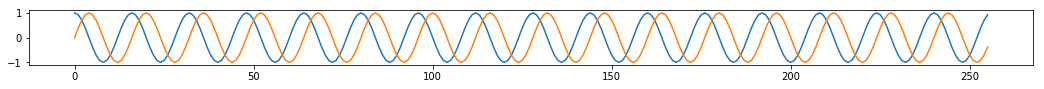

248번 진동


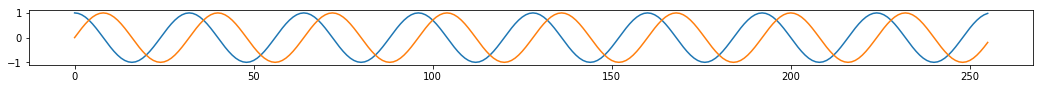

In [7]:
# [0, 1, 2, ..., N-1]    
n = np.linspace(0, N-1, N)
# 0번 진동(무진동)부터 N-1번 진동까지 8씩 띄어서 보여줌 
for k in range(0, N, 8):
    # N구간 내에서 k번 진동하는 cos파형과 sin파형 만듬, cos은 real axis, sin파형은 imagenary axis에...
    # k가 N/2를 넘어가면 aliasing현상으로 N-k번 진동하는 파형으로 나타남에 주목(중요)
    
    # 아래 두식은 euler's formula에 의해서 같다.
    complex_basis = np.exp(-1j * 2 * np.pi * k * n / N)
    complex_basis = np.cos(2 * np.pi * k * n / N) - 1j * np.sin(2 * np.pi * k * n / N)
    
    '''
    complex exponential function basis 보여주기
    '''
    print(str(k) + '번 진동')
    plt.figure(figsize=[18, 1])
    plt.plot(np.real(complex_basis))
    plt.plot(np.imag(complex_basis))
    plt.ylim([-1.1, 1.1])
    plt.show()
    

#### DFT(Discrete Fourier Transform) = complex exponential function basis의 coefficients 구하기
### $X_k=\sum_{n=0}^{N-1}x[n] \cdot e^{-j2\pi k n/N}$

cos coefficients, sin coefficients


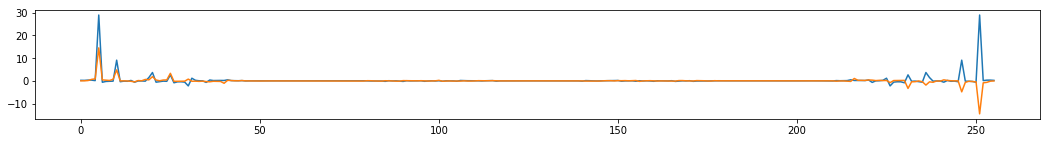

magnitude


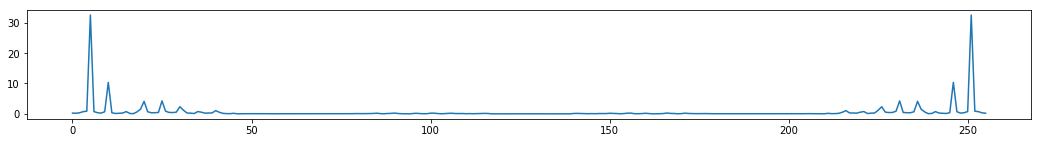

phase


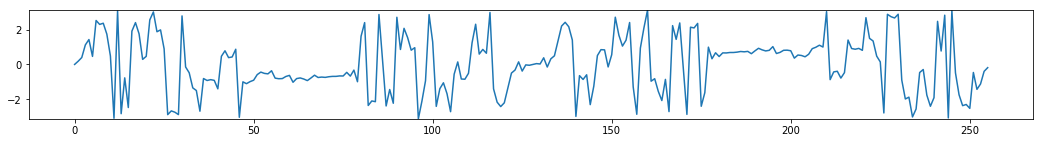

In [15]:
# [0, 1, 2, ..., N-1]
n = np.linspace(0, N-1, N)

complex_coefficients = []
for k in range(0, N):
    # N구간 내에서 k번 진동하는 cos파형과 sin파형 만듬, cos은 real axis, sin파형은 imagenary axis에...
    complex_basis = np.exp(-1j * 2 * np.pi * k * n / N)
    # 데이터 프레임과 complex basis를 곱하고 모든 값을 더해 해당 basis에 대한 계수(coefficient)를 구한다.
    coefficient = np.sum(frame * complex_basis)
    complex_coefficients.append(coefficient)
    
complex_coefficients = np.array(complex_coefficients)

'''
complex coefficients 시각화
'''
print('cos coefficients, sin coefficients')
plt.figure(figsize=[18, 2])
plt.plot(np.real(complex_coefficients))
plt.plot(np.imag(complex_coefficients))
plt.show()

'''
complex coefficients의 magnitude, phase 시각화
'''
print('magnitude')
plt.figure(figsize=[18, 2])
plt.plot(np.abs(complex_coefficients))
plt.show()

print('phase')
plt.figure(figsize=[18, 2])
plt.plot(np.angle(complex_coefficients))
plt.ylim([-np.pi, np.pi])
plt.show()


### DFT Matrix
<img src="pics/dft_matrix.png" width="500">
https://en.wikipedia.org/wiki/DFT_matrix

### without windowing

frame


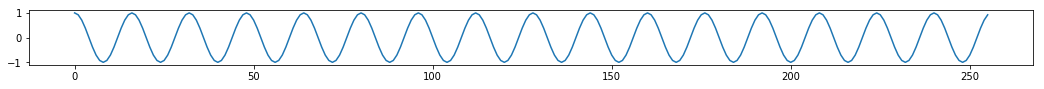

window


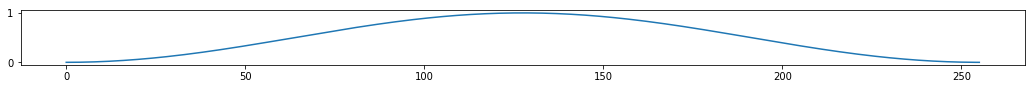

windowed frame


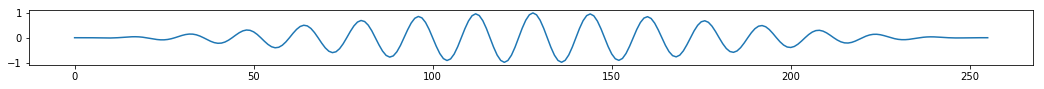

spectrum


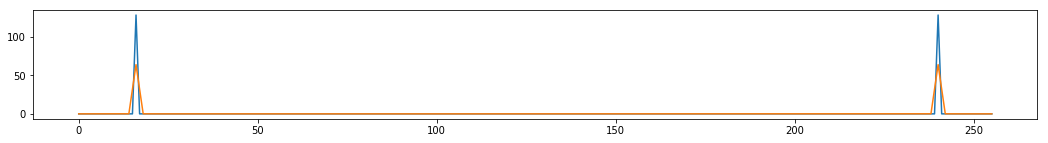

In [9]:
# 구간 길이 지정
N = 256
# 해당 구간 안에서 몇 번 진동이 반복 될지 지정
k = 16
n = np.linspace(0, N-1, N)
y = np.cos(2 * np.pi * k * n / N)

print('frame')
plt.figure(figsize=[18, 1])
plt.plot(y) 
plt.show()

print('window')
plt.figure(figsize=[18, 1])
plt.plot(np.hanning(N)) 
plt.show()

print('windowed frame')
plt.figure(figsize=[18, 1])
plt.plot(y * np.hanning(N)) 
plt.show()

dft_not_windowed = np.abs(np.fft.fft(y))
dft_windowed = np.abs(np.fft.fft(y * np.hanning(N)))

print('spectrum')
plt.figure(figsize=[18, 2])
plt.plot(dft_not_windowed)
plt.plot(dft_windowed)
plt.show()


### with windowing

frame


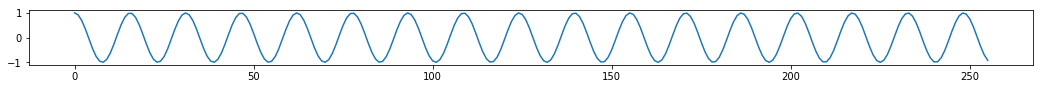

window


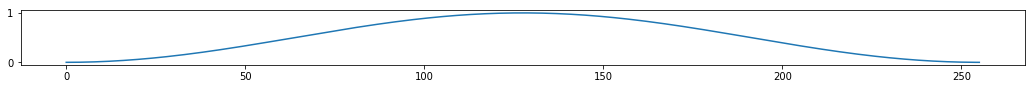

windowed frame


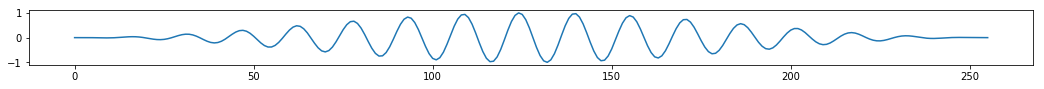

spectrum


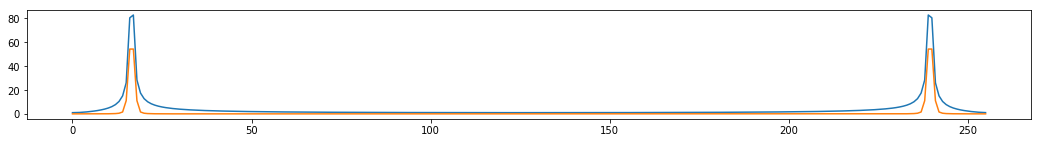

In [10]:
# 구간 길이 지정
N = 256
# 해당 구간 안에서 몇 번 진동이 반복 될지 지정
k = 16.5
n = np.linspace(0, N-1, N)
y = np.cos(2 * np.pi * k * n / N)

print('frame')
plt.figure(figsize=[18, 1])
plt.plot(y) 
plt.show()

print('window')
plt.figure(figsize=[18, 1])
plt.plot(np.hanning(N)) 
plt.show()

print('windowed frame')
plt.figure(figsize=[18, 1])
plt.plot(y * np.hanning(N)) 
plt.show()

dft_not_windowed = np.abs(np.fft.fft(y))
dft_windowed = np.abs(np.fft.fft(y * np.hanning(N)))

print('spectrum')
plt.figure(figsize=[18, 2])
plt.plot(dft_not_windowed)
plt.plot(dft_windowed)
plt.show()


### STFT 구현하기

In [11]:
'''
DFT matrix 구현
'''
def get_dft_matrix(N):
    n = np.linspace(0, N-1, N)
    matrix = []
    for k in range(N):
        column = np.cos(2 * np.pi * k * n / N) - 1j * np.sin(2 * np.pi * k * n / N)
        matrix.append(column)
    matrix = np.stack(matrix, axis=0)
    
    # 나머지 절반은 conjugate symmetric하므로 절반까지만 반환(nyquist frequency포함)
    return matrix[:int(N/2)+1, :]
    
'''
STFT(short time fourier transform) 구현
'''
def stft(wav, n_dft=2048, hop_length=512, window=np.hanning):
    
    dfts = []
    dft_matrix = get_dft_matrix(n_dft)
    
    # 0부터 len(wav)까지 hop_length씩 움직이면서 n_dft길이 만큼 dft를 수행
    for start_index in range(0, len(wav), hop_length):
        
        # n_dft길이 만큼 frame을 설정
        frame = wav[start_index:start_index+n_dft]
        
        # frame길이가 n_dft보다 짧으면 스킵, 보통은 padding후 DFT수행하나 여기선 생략
        if len(frame) < n_dft:
            break
        
        # windowing
        frame = frame * window(n_dft)
        # DFT
        dft = dft_matrix @ frame
        dfts.append(dft)
    
    # dft수행 결과들을 array에 담음
    dfts = np.stack(dfts, axis=1)
    
    return dfts
        

### STFT결과 확인, librosa의 결과와 비교하기

spectrogram shape : (1025, 412)


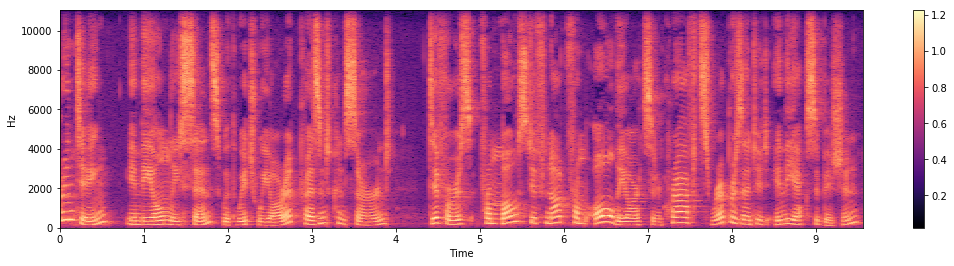

In [12]:
spec = np.abs(stft(wav))
print('spectrogram shape :', spec.shape)

plt.figure(figsize=[18, 4])
librosa.display.specshow(normalize(spec), y_axis='linear', x_axis='time')
plt.colorbar()
plt.show()

### melspectrogram

mel matrix shape : (80, 1025)


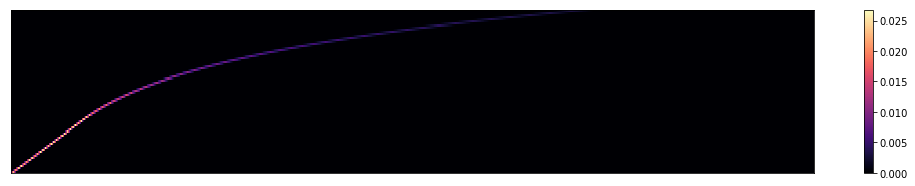

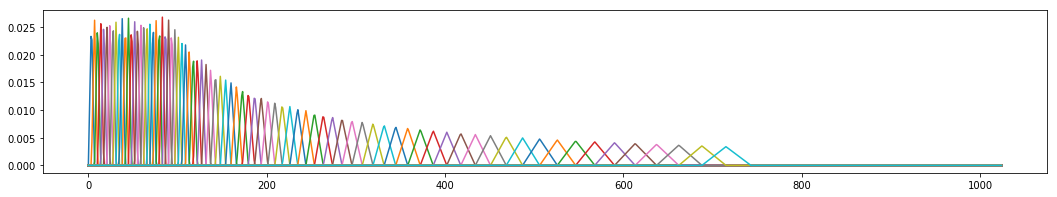

In [13]:
# mel-spectrogram을 만들기 위한 matrix 구하기
mel_matrix = librosa.filters.mel(sr=22050, n_fft=2048, fmin=0.0, fmax=8000, n_mels=80)
print('mel matrix shape :', mel_matrix.shape)

# mel matrix 시각화1
plt.figure(figsize=[18, 3])
librosa.display.specshow(mel_matrix)
plt.colorbar()
plt.show()

# mel matrix 시각화2
plt.figure(figsize=[18, 3])
for i in range(80):
    plt.plot(mel_matrix[i])
plt.show()

mel-spectrogram shape: (80, 412)


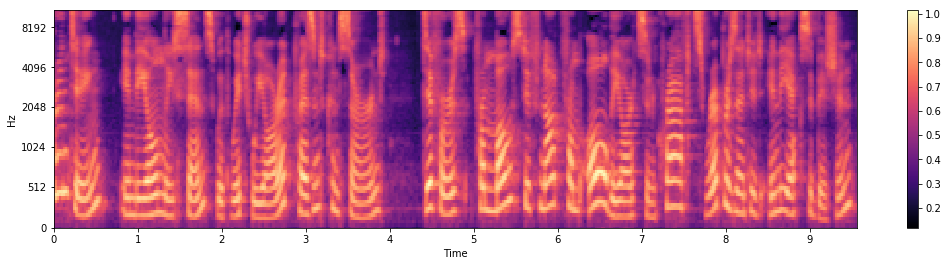

In [14]:
# spectrogram에 mel-matrix 적용
mel = mel_matrix @ spec
print('mel-spectrogram shape:', mel.shape)

# mel-spectrogram 시각화
plt.figure(figsize=[18, 4])
librosa.display.specshow(normalize(mel), y_axis='mel', x_axis='time')
plt.colorbar()
plt.show()